In [330]:
#Dependencies
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



In [331]:
#File paths
folder_path = "."  
file_part4 = os.path.join(folder_path, "morticd10_part4_cleaned_df.csv")
file_part5 = os.path.join(folder_path, "morticd10_part5_cleaned_df.csv")


In [332]:
#Double Checking current working directory
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata


In [333]:
#Loading the datasets if not error
try:
    part4_df = pd.read_csv(file_part4)
    part5_df = pd.read_csv(file_part5)
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}")

Datasets loaded successfully!


In [334]:
#We are going to load the CSV file containing the country codes into a DataFrame
country_codes_path = os.path.join(folder_path, "data/country_codes.csv")



In [335]:
#Checking Directory
print("Current Working Directory:", os.getcwd())

#Listing all files in the `cleaneddata` directory if it exists
cleaneddata_path = './cleaneddata'
if os.path.exists(cleaneddata_path):
	print("Files in `cleaneddata` directory:")
	print(os.listdir(cleaneddata_path))
else:
	print(f"Directory `{cleaneddata_path}` does not exist.")

#List all files in the `data` directory if it exists
data_path = './data'
if os.path.exists(data_path):
	print("Files in `data` directory:")
	print(os.listdir(data_path))
else:
	print(f"Directory `{data_path}` does not exist.")



Current Working Directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata
Files in `cleaneddata` directory:
['latests_version_part4_reordered.csv', 'morticd10_part4_cleaned_df.csv', 'morticd10_part5_cleaned_df.csv']
Files in `data` directory:
[]


In [336]:
#There were two "data" folders, we were verifying the correct with the rigth file path
import os

data_path = "./data"
if os.path.exists(data_path):
    print(f"Files in {data_path} directory:")
    print(os.listdir(data_path))
else:
    print(f"Directory {data_path} does not exist.")


Files in ./data directory:
[]


In [337]:
# Print the current working directory
print(f"Current working directory: {os.getcwd()}")


Current working directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata


In [338]:
#display country_codes_path 
country_codes_path = "C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv"
country_codes_path



'C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv'

In [339]:
#Importing the country codes CSV file into a DataFrame

country_codes_path = "C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv"

# Check if the file exists and is not empty
if os.path.exists(country_codes_path) and os.path.getsize(country_codes_path) > 0:
    country_codes_df = pd.read_csv(country_codes_path)
    print(country_codes_df.head())
else:
    print(f"Error: The file {country_codes_path} does not exist or is empty.")



   country          name
0     1010       Algeria
1     1020        Angola
2     1025         Benin
3     1030      Botswana
4     1035  Burkina Faso


In [340]:
#Creating the DataFrame with the due Country Name matching the code

#Extracting Column 
country_codes_df.columns = ['Country_code', 'Country_name']

#Merging the DataFrames, 
#'Country' in `part4_df` matches 'Country_code' in `country_codes_df`
part4_df = part4_df.merge(country_codes_df, left_on='Country', right_on='Country_code', how='left')

#Eliminating the 'Country_code' column after the merge if no longer needed
part4_df = part4_df.drop(columns=['Country_code'])

#Displaying the updated DataFrame
print(part4_df.head())


   Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  IM_Deaths2  \
0     1400  2013   101  1000    1      383         5.0         1.0   
1     1400  2013   101  1000    2      334         2.0         7.0   
2     1400  2013   101  1001    1       28         0.0         0.0   
3     1400  2013   101  1001    2       30         0.0         2.0   
4     1400  2013   101  1002    1        0         0.0         0.0   

   IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  mort_45_64  \
0         2.0         4.0       0.0        6.0        44.0       103.0   
1         3.0         5.0       2.0        3.0        20.0        60.0   
2         0.0         0.0       0.0        0.0         6.0        11.0   
3         2.0         1.0       0.0        0.0         0.0         6.0   
4         0.0         0.0       0.0        0.0         0.0         0.0   

   mort_65_84  mort_85_95+  Deaths26 Country_name  
0       218.0          0.0       0.0   Seychelles  
1       232.0          0.0    

In [341]:
#Setting up the Country_Name next to Code_Country to place Country_name in column A and Country in column B
column_order = ['Country_name', 'Country'] + [col for col in part4_df.columns if col not in ['Country_name', 'Country']]
part4_df = part4_df[column_order]

#Output path
output_path = os.path.join('./cleaneddata', "latests_version_part4_reordered.csv")

#Double Checking the directory exists
os.makedirs('./cleaneddata', exist_ok=True)

#Exporting the reordered DataFrame to a new CSV file
part4_df.to_csv(output_path, index=False)


#Displaying the new DataFrame edited with the right code coutnry and country name
print(part4_df.head())


  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [342]:

#Path to the Cause_List.csv file
file_path = "C:/Users/User/Desktop/Project_3/Project3/data/Cause_List.csv"

#Loading the CSV into a DataFrame
cause_list_df = pd.read_csv(file_path)

#Extracting columns A and C 
new_cause_list_df = cause_list_df.iloc[:, [0, 2]]

#Displaying the new DataFrame
print(new_cause_list_df)




     code                                              Cause
0    1000                                         All causes
1    1001          Certain infectious and parasitic diseases
2    1002                                            Cholera
3    1003  Diarrhoea and gastroenteritis of presumed infe...
4    1004               Other intestinal infectious diseases
..    ...                                                ...
102  1102                                            Assault
103  1103                          All other external causes
104  1901  Severe acute respiratory syndrome [SARS], unsp...
105  1902                            Vaping-related disorder
106  1903                                           COVID-19

[107 rows x 2 columns]


In [343]:
#Path to the reordered CSV file
latests_version_part4_reordered = pd.read_csv(output_path)

#Showing the dataframe to confirm it loaded correctly with Conuntry_Name and Country columns in the right order 
print(latests_version_part4_reordered.head())

#Avoiding issue another CSV file if exists
output_path_reordered = './cleandata/latest_version_part4_reordered.csv'

if not os.path.exists(output_path_reordered):
    part4_df.to_csv(output_path_reordered, index=False)



  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [344]:
#1ST DATA FRAME TO MERGE 
print(latests_version_part4_reordered.head())


  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [345]:
#2ND DATA FRAME TO MERGE
print(new_cause_list_df.head()) 

   code                                              Cause
0  1000                                         All causes
1  1001          Certain infectious and parasitic diseases
2  1002                                            Cholera
3  1003  Diarrhoea and gastroenteritis of presumed infe...
4  1004               Other intestinal infectious diseases


In [346]:
#Chaning the column names to match the column names in the other DataFrame
new_cause_list_df.rename(columns={"code": "Cause_Code", "Cause": "Cause_Name"}, inplace=True)
new_cause_list_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25476\3441228761.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cause_Code,Cause_Name
0,1000,All causes
1,1001,Certain infectious and parasitic diseases
2,1002,Cholera
3,1003,Diarrhoea and gastroenteritis of presumed infe...
4,1004,Other intestinal infectious diseases


In [347]:
#Checking on both columns are strings 
latests_version_part4_reordered['Cause'] = latests_version_part4_reordered['Cause'].astype(str)
new_cause_list_df['Cause_Code'] = new_cause_list_df['Cause_Code'].astype(str)

#Merging the two DataFrames: `latests_version_part4_reordered` and `new_cause_list_df`
part4_df = latests_version_part4_reordered.merge(new_cause_list_df, left_on='Cause', right_on='Cause_Code', how='left')

#Displaying the updated DataFrame
print(part4_df.head())



C:\Users\User\AppData\Local\Temp\ipykernel_25476\218226482.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26 Cause_Code  \
0       103.0       218.0          0.0       0.0       1000   
1 

In [348]:
#Changing the column order, to have the columns in the right order after list, code cause and cause name, 
columns_before_list = ["Country_name", "Country", "Year", "List"]
columns_after_list = ["Cause_Code", "Cause_Name"]
remaining_columns = [col for col in part4_df.columns if col not in columns_before_list + columns_after_list]

#Final Output Order 
final_column_order = columns_before_list + columns_after_list + remaining_columns
part4_df = part4_df[final_column_order]

#Printing the updated version
print(part4_df.head())

#List and Cause_Code Cause_Name are related.  The list is needed to find the cause of death



  Country_name  Country  Year  List Cause_Code  \
0   Seychelles     1400  2013   101       1000   
1   Seychelles     1400  2013   101       1000   
2   Seychelles     1400  2013   101       1001   
3   Seychelles     1400  2013   101       1001   
4   Seychelles     1400  2013   101       1002   

                                  Cause_Name Cause  Sex  Deaths1  IM_Deaths1  \
0                                 All causes  1000    1      383         5.0   
1                                 All causes  1000    2      334         2.0   
2  Certain infectious and parasitic diseases  1001    1       28         0.0   
3  Certain infectious and parasitic diseases  1001    2       30         0.0   
4                                    Cholera  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0

In [349]:
#Saving the updated DataFrame into a CSV file in the same folder
output_path_with_causes = "./cleandata/latest_version_part4_with_causes.csv"
output_path_reordered = "./cleandata/latest_version_part4_reordered.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path_with_causes), exist_ok=True)

#Final DataFrame with causes
part4_df.to_csv(output_path_with_causes, index=False)
#Verifying the file was saved and to avoid duplicates
latests_version_part4_reordered.to_csv(output_path_reordered, index=False)
#Displaying the message
print(f"Files saved successfully to the same folder:\n- {output_path_with_causes}\n- {output_path_reordered}")



Files saved successfully to the same folder:
- ./cleandata/latest_version_part4_with_causes.csv
- ./cleandata/latest_version_part4_reordered.csv


In [350]:
#Recalculating the top 10 causes excluding "All Causes" or "AAA"
top10_causes = part4_df[part4_df["Cause_Name"] != "AAA"].groupby("Cause_Name")["Deaths1"].sum().nlargest(10)
top10_causes

Cause_Name
All causes                                                                                 9122705
Diseases of the circulatory system                                                         4784699
Ischaemic heart diseases                                                                   2686216
Neoplasms                                                                                  1389085
Cerebrovascular diseases                                                                   1383694
External causes of morbidity and mortality                                                  816407
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified     644771
Diseases of the digestive system                                                            448500
Other heart diseases                                                                        416930
Diseases of the respiratory system                                                          337421

In [351]:
#Percentage by cause of death
top10_causes_percentage = top10_causes / top10_causes.sum() * 100
print(top10_causes_percentage)



Cause_Name
All causes                                                                                 41.409568
Diseases of the circulatory system                                                         21.718593
Ischaemic heart diseases                                                                   12.193208
Neoplasms                                                                                   6.305302
Cerebrovascular diseases                                                                    6.280831
External causes of morbidity and mortality                                                  3.705815
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified     2.926729
Diseases of the digestive system                                                            2.035821
Other heart diseases                                                                        1.892519
Diseases of the respiratory system                                              

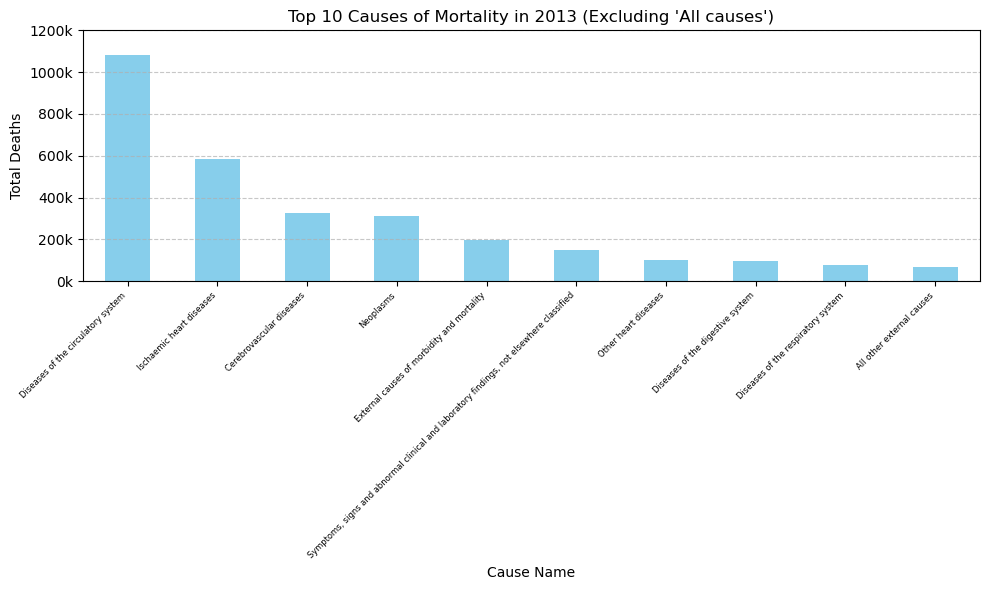

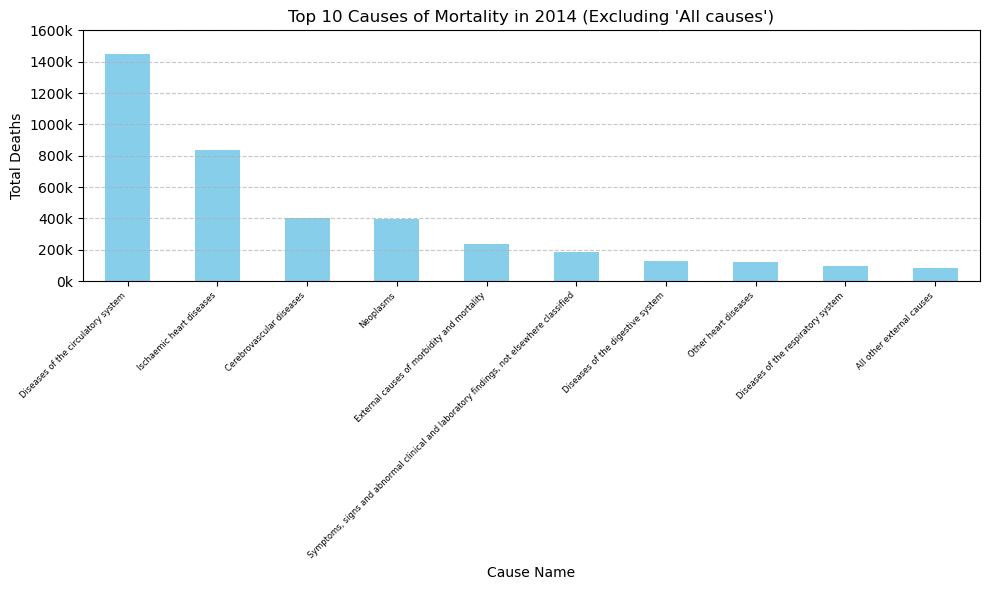

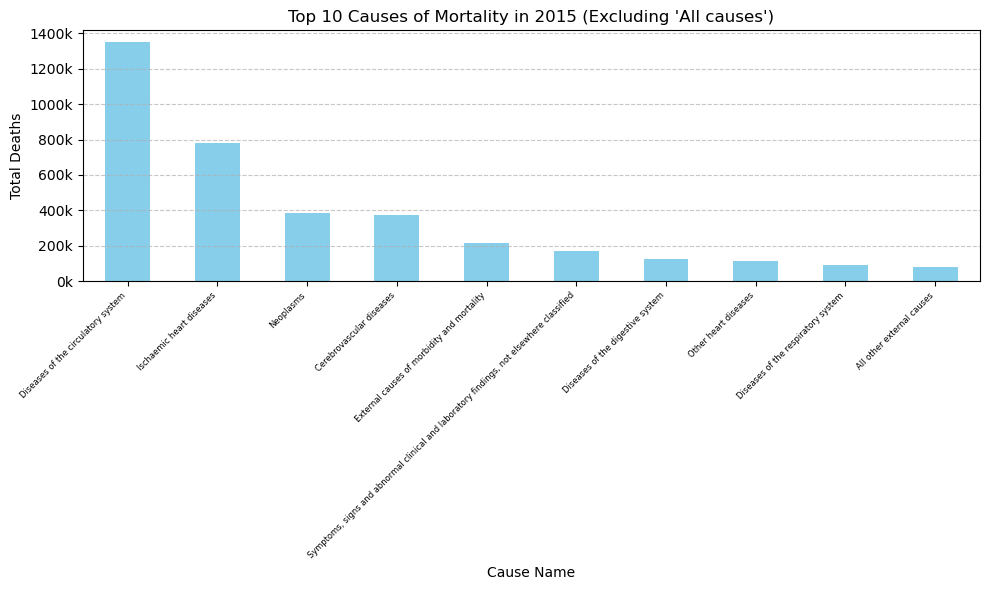

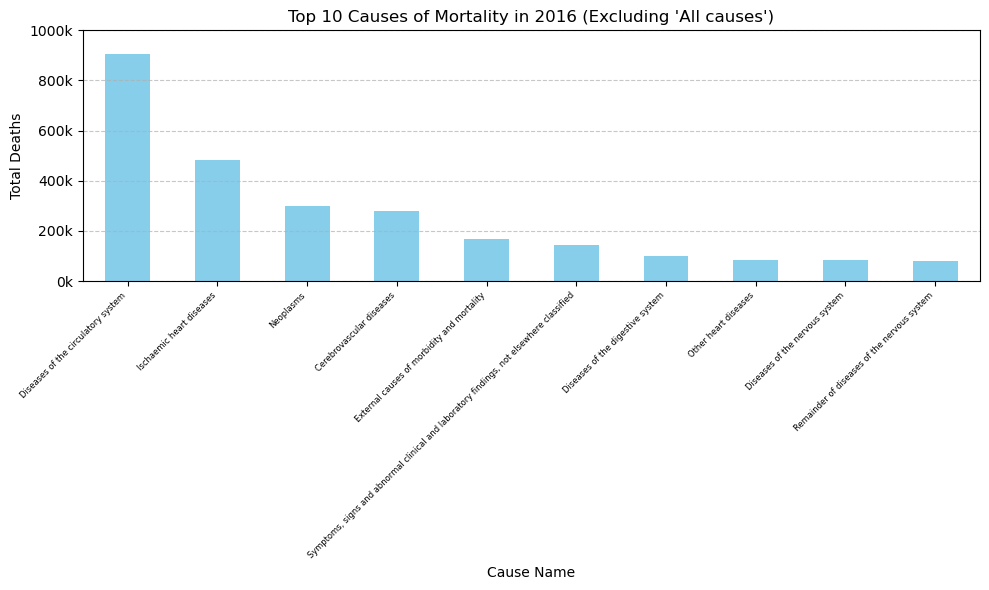

In [352]:
# Filter data to exclude "All causes" and "AAA"
filtered_data = part4_df[~part4_df["Cause_Name"].isin(["All causes", "AAA"])]

# Get unique years from the DataFrame
years = sorted(filtered_data["Year"].unique())

# Iterate through each year to plot the top 10 causes
for year in years:
    yearly_data = filtered_data[filtered_data["Year"] == year]
    #Using the Groupby Function wuth 'Cause_Name' to calculate the total for 'Deaths1', to later get the top 10
    top_10_yearly = yearly_data.groupby("Cause_Name")["Deaths1"].sum().nlargest(10)

    #Graph Top 10 causes eachyear
    plt.figure(figsize=(10, 6))
    ax = top_10_yearly.plot(kind="bar", color="skyblue")

    #Y-axis set-up to show numbers each 200k deaths
    ax.set_yticks(range(0, int(top_10_yearly.max() + 200000), 200000))  # Add ticks every 200,000
    ax.set_yticklabels([f"{int(y/1000)}k" for y in ax.get_yticks()])  # Label ticks in thousands

    #Labeling the graph
    plt.title(f"Top 10 Causes of Mortality in {year} (Excluding 'All causes')")
    plt.xlabel("Cause Name")
    plt.ylabel("Total Deaths")
    plt.xticks(rotation=45, ha="right", fontsize=6)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  
    plt.tight_layout()
    plt.show()

    #Because this dataset is from 2013 to 2016, we are going to plot the top 10 causes of death for each year from 2013 to 2016




MAKING THE SAME PROCESS, BUT THIS TIME FOR PART_5 WHICH COVERS THE YEARS 2017 TO 2022 TO COMPLETE THE 10 YEARS. THIS STEP IS NECCESARY DUE TO THE VAST DATABASE WITH MORE THAN 1.9 MILLION ROWS.

In [353]:
#Loading the new dataset part_5 years (2017-2022)
file_path = r"C:\Users\User\Desktop\Project_3\Project3\cleaneddata\morticd10_part5_cleaned_df.csv"
part5_df = pd.read_csv(file_path)

#Running Diagnostic to check the data
print("Dataset Info:")
print(part5_df.info())

#Printing the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(part5_df.head())

#Checking Data structure to match column names
print("\nColumn Names:")
print(part5_df.columns)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023260 entries, 0 to 1023259
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Country_code    1023260 non-null  int64 
 1   Year            1023260 non-null  int64 
 2   List            1023260 non-null  int64 
 3   Cause           1023260 non-null  object
 4   Sex             1023260 non-null  int64 
 5   Total_deaths    1023260 non-null  int64 
 6   Mort_day0       1023260 non-null  int64 
 7   Mort_day1_6     1023260 non-null  int64 
 8   Mort_day7_27    1023260 non-null  int64 
 9   Mort_day28_365  1023260 non-null  int64 
 10  mort_1_4        1023260 non-null  int64 
 11  mort_5_24       1023260 non-null  int64 
 12  mort_25_44      1023260 non-null  int64 
 13  mort_45_64      1023260 non-null  int64 
 14  mort_65_84      1023260 non-null  int64 
 15  mort_85_95+     1023260 non-null  int64 
 16  Deaths26        1023260 non-null  int64 

In [354]:
#Calling the dataframe that we are going to use to merge with the part_5 dataframe
#Checking the column names to match the column names in the other DataFrame
country_codes_df


,Country_code,Country_name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso
...,...,...
222,5197,Samoa
223,5198,Solomon Islands
224,5200,Tonga
225,5205,Tuvalu


In [355]:
print("Part5 DataFrame Columns:", part5_df.columns)
print("Country Codes DataFrame Columns:", country_codes_df.columns)


Part5 DataFrame Columns: Index(['Country_code', 'Year', 'List', 'Cause', 'Sex', 'Total_deaths',
       'Mort_day0', 'Mort_day1_6', 'Mort_day7_27', 'Mort_day28_365',
       'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64', 'mort_65_84',
       'mort_85_95+', 'Deaths26'],
      dtype='object')
Country Codes DataFrame Columns: Index(['Country_code', 'Country_name'], dtype='object')


In [356]:
#Merging country_codes_df with part5_df
part5_df = part5_df.merge(country_codes_df, on='Country_code', how='left')


In [357]:
#Displaying the updated DataFrame after the merge, the result of coountry_codes_df and part5_df
print(part5_df.head())


   Country_code  Year  List Cause  Sex  Total_deaths  Mort_day0  Mort_day1_6  \
0          4303  2017   101  1000    1        281784       1608            0   
1          4303  2017   101  1000    2        292339       1178            0   
2          4303  2017   101  1001    1          6198         41            0   
3          4303  2017   101  1001    2          2516         29            0   
4          4303  2017   101  1002    1             0          0            0   

   Mort_day7_27  Mort_day28_365  mort_1_4  mort_5_24  mort_25_44  mort_45_64  \
0             0               0       357       2593       26494       86787   
1             0               0       241        998        9009       37295   
2             0               0        29         65        3019        2670   
3             0               0        19         51        1317         808   
4             0               0         0          0           0           0   

   mort_65_84  mort_85_95+  Deaths26 C

In [358]:
#Reordering Columns, due that i have Country_Name on the rigth extreme and Country_Code is all the way to the left.
#Moving the columns to have Country_name side to side to Country_code
columns_order = [
    "Country_code", "Country_name", "Year", "List", "Cause", "Sex", 
    "Total_deaths", "Mort_day0", "Mort_day1_6", "Mort_day7_27", 
    "Mort_day28_365", "mort_1_4", "mort_5_24", "mort_25_44", 
    "mort_45_64", "mort_65_84", "mort_85_95+", "Deaths26"
]

#Updating the DataFrame with the new column order
part5_df = part5_df[columns_order]

#Printing the Result after ordering the columns
print(part5_df.head())


   Country_code Country_name  Year  List Cause  Sex  Total_deaths  Mort_day0  \
0          4303      Ukraine  2017   101  1000    1        281784       1608   
1          4303      Ukraine  2017   101  1000    2        292339       1178   
2          4303      Ukraine  2017   101  1001    1          6198         41   
3          4303      Ukraine  2017   101  1001    2          2516         29   
4          4303      Ukraine  2017   101  1002    1             0          0   

   Mort_day1_6  Mort_day7_27  Mort_day28_365  mort_1_4  mort_5_24  mort_25_44  \
0            0             0               0       357       2593       26494   
1            0             0               0       241        998        9009   
2            0             0               0        29         65        3019   
3            0             0               0        19         51        1317   
4            0             0               0         0          0           0   

   mort_45_64  mort_65_84  mort_

In [359]:
#Printing new_cost_list_df to check the columns to make sure they match the column names in part5_df
new_cause_list_df.head()

,Cause_Code,Cause_Name
0,1000,All causes
1,1001,Certain infectious and parasitic diseases
2,1002,Cholera
3,1003,Diarrhoea and gastroenteritis of presumed infe...
4,1004,Other intestinal infectious diseases


In [360]:
print(part5_df.columns)


Index(['Country_code', 'Country_name', 'Year', 'List', 'Cause', 'Sex',
       'Total_deaths', 'Mort_day0', 'Mort_day1_6', 'Mort_day7_27',
       'Mort_day28_365', 'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64',
       'mort_65_84', 'mort_85_95+', 'Deaths26'],
      dtype='object')


In [361]:
# Merging part5_df with new_cause_list_df on the 'Cause' column in part5_df and 'Cause_Code' in new_cause_list_df
part5_df = part5_df.merge(new_cause_list_df, how="left", left_on="Cause", right_on="Cause_Code")

# Displaying the first few rows of the updated DataFrame to confirm the merge
part5_df


,Country_code,Country_name,Year,List,Cause,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26,Cause_Code,Cause_Name
0,4303,Ukraine,2017,101,1000,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68,1000,All causes
1,4303,Ukraine,2017,101,1000,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19,1000,All causes
2,4303,Ukraine,2017,101,1001,1,6198,41,0,0,0,29,65,3019,2670,358,15,1,1001,Certain infectious and parasitic diseases
3,4303,Ukraine,2017,101,1001,2,2516,29,0,0,0,19,51,1317,808,263,29,0,1001,Certain infectious and parasitic diseases
4,4303,Ukraine,2017,101,1002,1,0,0,0,0,0,0,0,0,0,0,0,0,1002,Cholera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023255,5020,Australia,2022,104,Y871,1,1,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN
1023256,5020,Australia,2022,104,Y883,1,4,0,0,0,0,0,0,2,0,1,1,0,NaN,NaN
1023257,5020,Australia,2022,104,Y883,2,3,0,0,0,0,0,0,0,1,2,0,0,NaN,NaN
1023258,5020,Australia,2022,104,Y890,2,1,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN


In [362]:
#Eliminatiing "Cause" Column rigth after "List" column
part5_df = part5_df.drop(columns=["Cause"])

In [363]:
new_cause_list_df

,Cause_Code,Cause_Name
0,1000,All causes
1,1001,Certain infectious and parasitic diseases
2,1002,Cholera
3,1003,Diarrhoea and gastroenteritis of presumed infe...
4,1004,Other intestinal infectious diseases
...,...,...
102,1102,Assault
103,1103,All other external causes
104,1901,"Severe acute respiratory syndrome [SARS], unsp..."
105,1902,Vaping-related disorder


In [364]:
#Checking the column names to move Cause_Code and Cause_Name rigth next list now that Cause Column is not required just duplicated 
part5_df.columns

Index(['Country_code', 'Country_name', 'Year', 'List', 'Sex', 'Total_deaths',
       'Mort_day0', 'Mort_day1_6', 'Mort_day7_27', 'Mort_day28_365',
       'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64', 'mort_65_84',
       'mort_85_95+', 'Deaths26', 'Cause_Code', 'Cause_Name'],
      dtype='object')

In [365]:
#Moving "Cause_Code and Cause_Name" columns to the right after "List" column
  #Defining the new column order for part5_df
columns_order = [
    'Country_code', 'Country_name', 'Year', 'List', 
    'Cause_Code', 'Cause_Name',  
    'Sex', 'Total_deaths', 
    'Mort_day0', 'Mort_day1_6', 'Mort_day7_27', 'Mort_day28_365',
    'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64',
    'mort_65_84', 'mort_85_95+', 'Deaths26'
]

#Updating the DataFrame with the new column order
part5_df = part5_df[columns_order]

#Printing the Result  
print(part5_df.head())
 

   Country_code Country_name  Year  List Cause_Code  \
0          4303      Ukraine  2017   101       1000   
1          4303      Ukraine  2017   101       1000   
2          4303      Ukraine  2017   101       1001   
3          4303      Ukraine  2017   101       1001   
4          4303      Ukraine  2017   101       1002   

                                  Cause_Name  Sex  Total_deaths  Mort_day0  \
0                                 All causes    1        281784       1608   
1                                 All causes    2        292339       1178   
2  Certain infectious and parasitic diseases    1          6198         41   
3  Certain infectious and parasitic diseases    2          2516         29   
4                                    Cholera    1             0          0   

   Mort_day1_6  Mort_day7_27  Mort_day28_365  mort_1_4  mort_5_24  mort_25_44  \
0            0             0               0       357       2593       26494   
1            0             0          

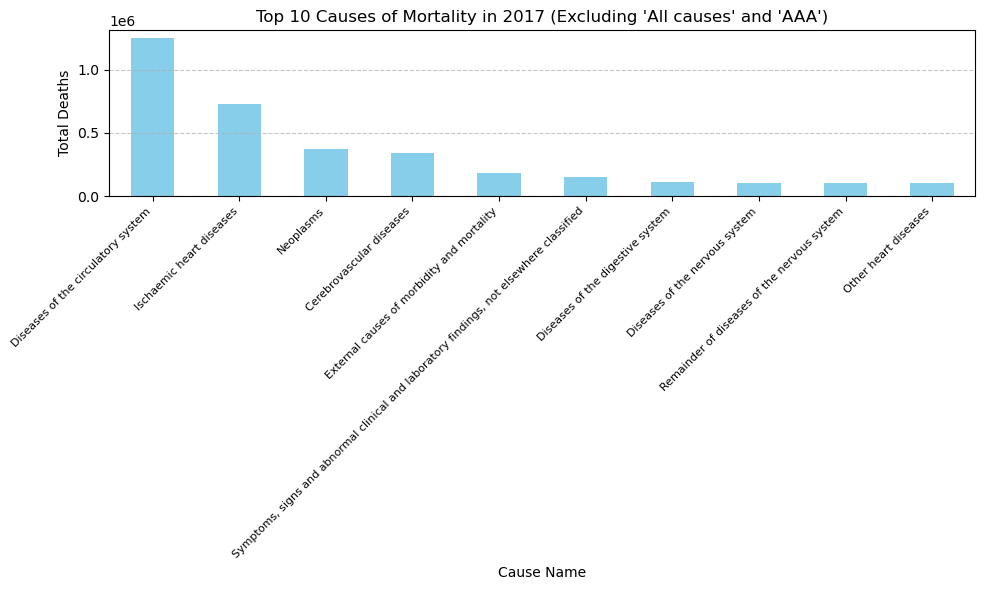

In [366]:
# Filter data for the year 2017 and exclude "All causes" and "AAA"
filtered_2017_data = part5_df[(part5_df['Year'] == 2017) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause_Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2017 = (
    filtered_2017_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Plot the Top 10 Causes of Mortality for 2017
plt.figure(figsize=(10, 6))
top_10_causes_2017.plot(kind="bar", color="skyblue")

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2017 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


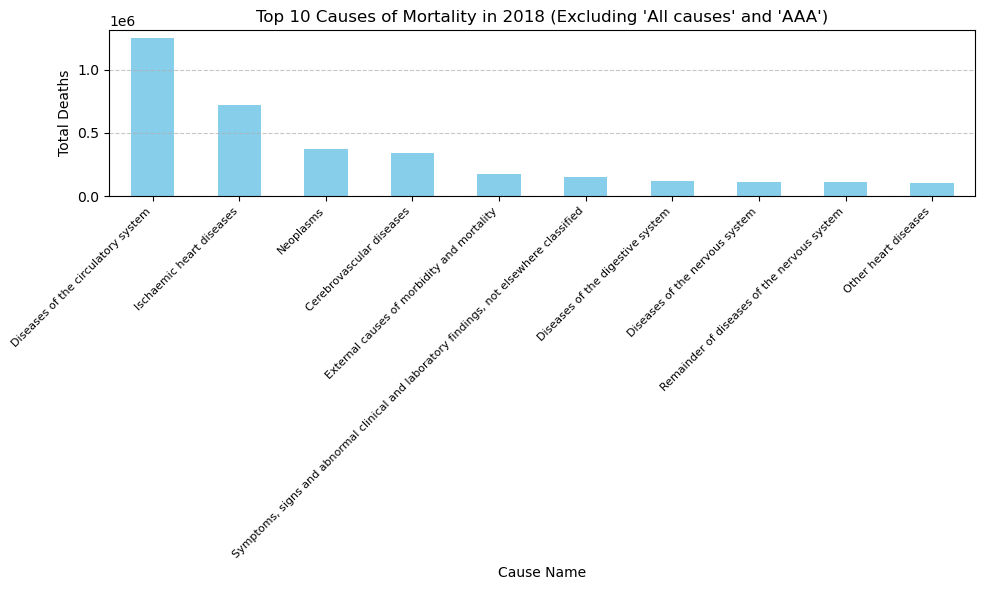

In [367]:
# Filter data for the year 2018 and exclude "All causes" and "AAA"
filtered_2018_data = part5_df[(part5_df['Year'] == 2018) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause_Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2018 = (
    filtered_2018_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Plot the Top 10 Causes of Mortality for 2018
plt.figure(figsize=(10, 6))
top_10_causes_2018.plot(kind="bar", color="skyblue")

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2018 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25476\3705911185.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



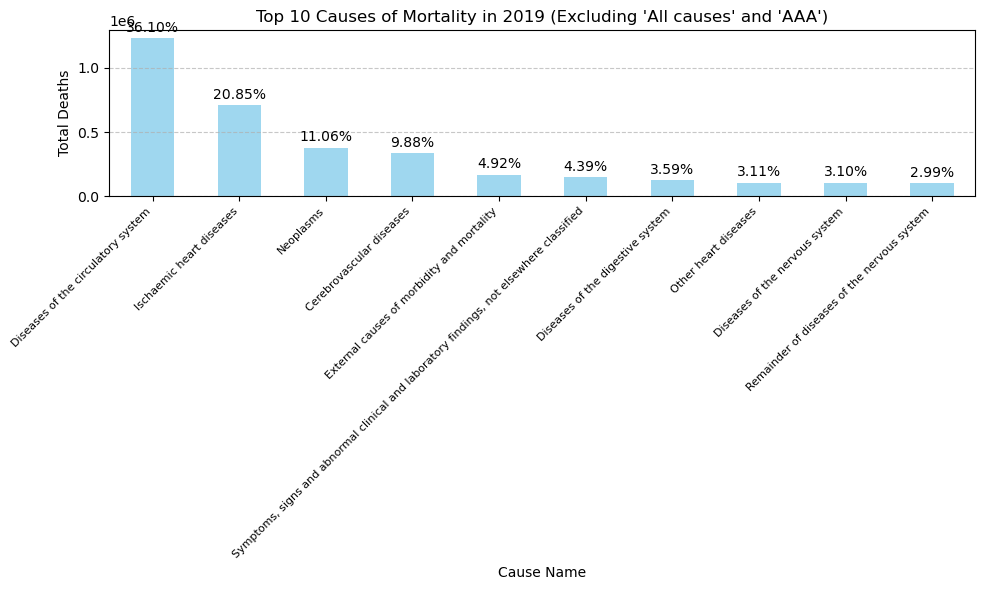

In [368]:
# Filter data for the year 2019 and exclude "All causes" and "AAA"
filtered_2019_data = part5_df[(part5_df['Year'] == 2019) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2019 = (
    filtered_2019_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Calculate percentages
total_deaths = top_10_causes_2019.sum()
percentages = (top_10_causes_2019 / total_deaths) * 100

# Plot the Top 10 Causes of Mortality for 2019
plt.figure(figsize=(10, 6))
top_10_causes_2019.plot(kind="bar", color="skyblue", alpha=0.8)

# Annotate percentages on top of each bar
for idx, value in enumerate(top_10_causes_2019):
    plt.text(idx, value + 50000, f"{percentages[idx]:.2f}%", ha="center", fontsize=10)

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2019 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


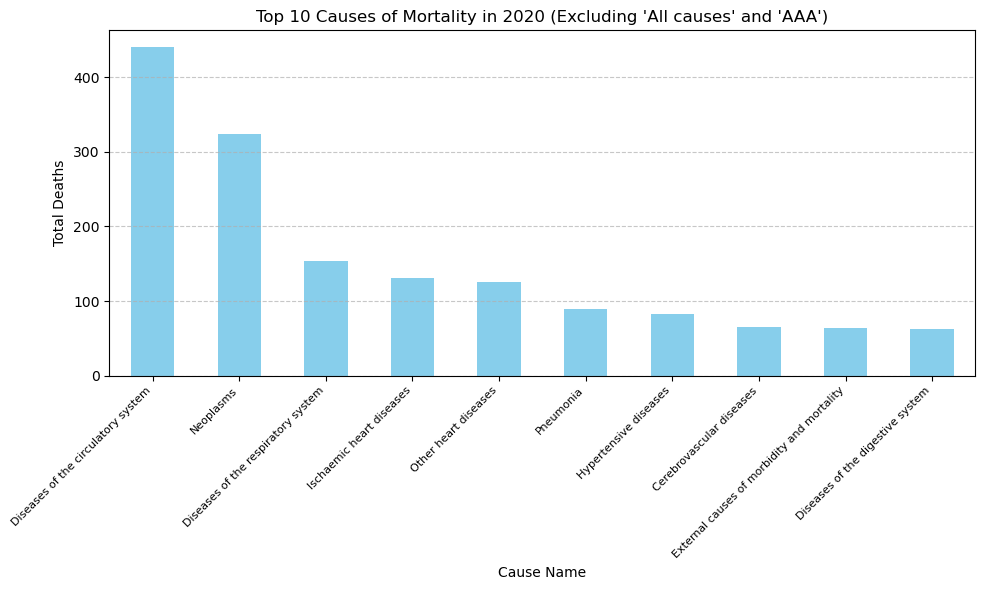

In [369]:
# Filter data for the year 2020 and exclude "All causes" and "AAA"
filtered_2020_data = part5_df[(part5_df['Year'] == 2020) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause_Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2020 = (
    filtered_2020_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Plot the Top 10 Causes of Mortality for 2020
plt.figure(figsize=(10, 6))
top_10_causes_2020.plot(kind="bar", color="skyblue")

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2020 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


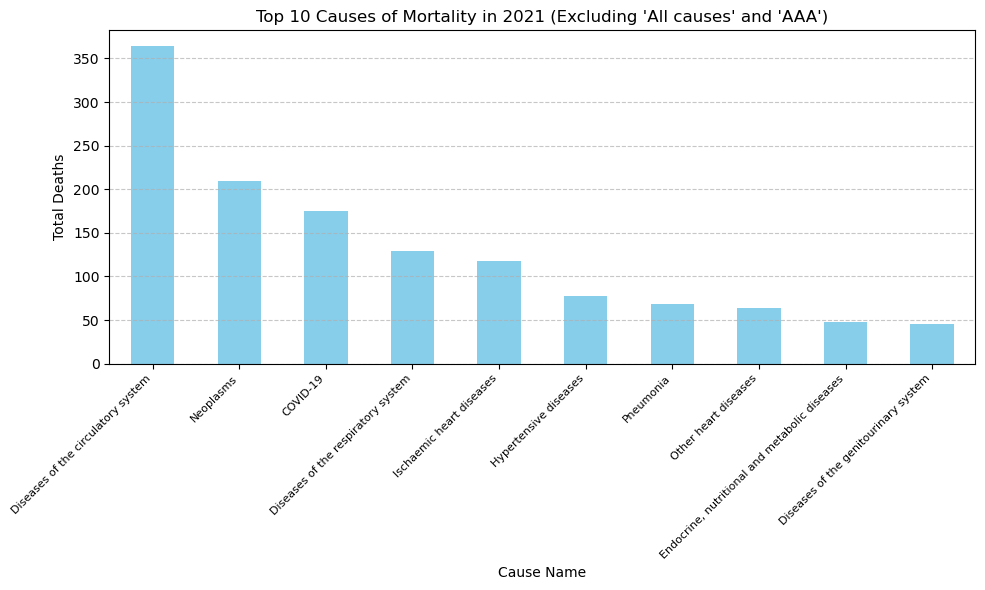

In [370]:
# Filter data for the year 2021 and exclude "All causes" and "AAA"
filtered_2021_data = part5_df[(part5_df['Year'] == 2021) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause_Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2021 = (
    filtered_2021_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Plot the Top 10 Causes of Mortality for 2021
plt.figure(figsize=(10, 6))
top_10_causes_2021.plot(kind="bar", color="skyblue")

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2021 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


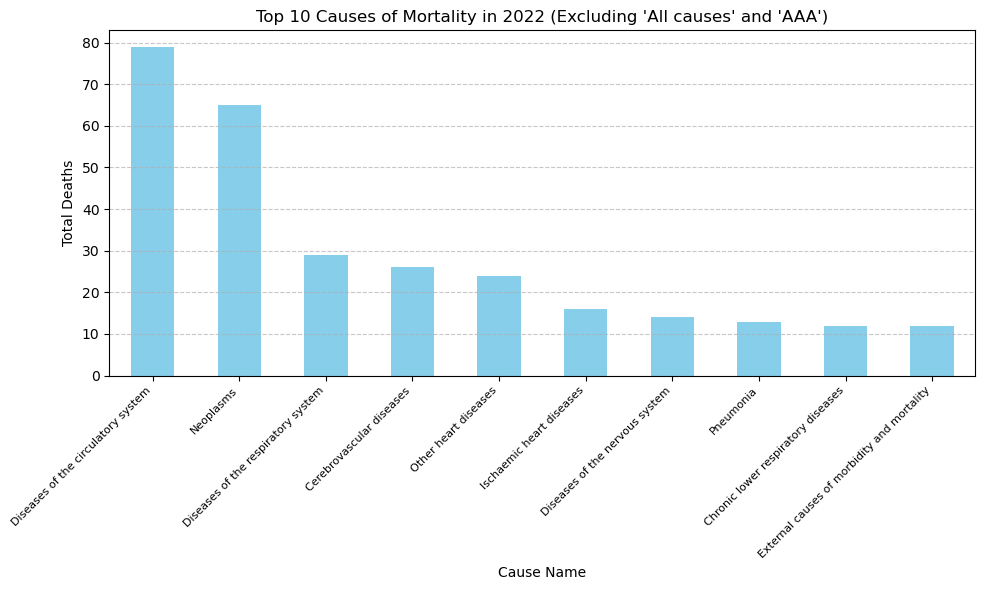

In [371]:
# Filter data for the year 2022 and exclude "All causes" and "AAA"
filtered_2022_data = part5_df[(part5_df['Year'] == 2022) & (~part5_df['Cause_Name'].isin(["All causes", "AAA"]))]

# Group by Cause_Name and sum Total_deaths to calculate the top 10 causes
top_10_causes_2022 = (
    filtered_2022_data.groupby("Cause_Name")["Total_deaths"]
    .sum()
    .nlargest(10)
)

# Plot the Top 10 Causes of Mortality for 2022
plt.figure(figsize=(10, 6))
top_10_causes_2022.plot(kind="bar", color="skyblue")

# Customize the graph
plt.title("Top 10 Causes of Mortality in 2022 (Excluding 'All causes' and 'AAA')")
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# DIAGNOSTIC FOR MATCH DATAFRAMES PART4_DF & PART_5DF 

In [372]:
#Printing column names for both datasets
print("Part 4 Columns:", part4_df.columns)
print("Part 5 Columns:", part5_df.columns)



Part 4 Columns: Index(['Country_name', 'Country', 'Year', 'List', 'Cause_Code', 'Cause_Name',
       'Cause', 'Sex', 'Deaths1', 'IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3',
       'IM_Deaths4', 'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64',
       'mort_65_84', 'mort_85_95+', 'Deaths26'],
      dtype='object')
Part 5 Columns: Index(['Country_code', 'Country_name', 'Year', 'List', 'Cause_Code',
       'Cause_Name', 'Sex', 'Total_deaths', 'Mort_day0', 'Mort_day1_6',
       'Mort_day7_27', 'Mort_day28_365', 'mort_1_4', 'mort_5_24', 'mort_25_44',
       'mort_45_64', 'mort_65_84', 'mort_85_95+', 'Deaths26'],
      dtype='object')


In [373]:
#Checking data types for part4_df 
print("\nPart 4 Data Types:\n", part4_df.dtypes)



Part 4 Data Types:
 Country_name     object
Country           int64
Year              int64
List              int64
Cause_Code       object
Cause_Name       object
Cause            object
Sex               int64
Deaths1           int64
IM_Deaths1      float64
IM_Deaths2      float64
IM_Deaths3      float64
IM_Deaths4      float64
mort_1_4        float64
mort_5_24       float64
mort_25_44      float64
mort_45_64      float64
mort_65_84      float64
mort_85_95+     float64
Deaths26        float64
dtype: object


In [374]:
#Checking data types for part5_df      
print("\nPart 5 Data Types:\n", part5_df.dtypes)


Part 5 Data Types:
 Country_code       int64
Country_name      object
Year               int64
List               int64
Cause_Code        object
Cause_Name        object
Sex                int64
Total_deaths       int64
Mort_day0          int64
Mort_day1_6        int64
Mort_day7_27       int64
Mort_day28_365     int64
mort_1_4           int64
mort_5_24          int64
mort_25_44         int64
mort_45_64         int64
mort_65_84         int64
mort_85_95+        int64
Deaths26           int64
dtype: object


In [375]:
#Checking missing values in key columns
key_columns = ['Country_code', 'Year', 'Cause_Code']

#Making sure 'Country_code' column is present in both DataFrames
if 'Country_code' not in part4_df.columns:
	part4_df['Country_code'] = part4_df['Country']

if 'Country_code' not in part5_df.columns:
	part5_df['Country_code'] = part5_df['Country']

print("\nMissing Values in Part 4:")
print(part4_df[key_columns].isnull().sum())
print("\nMissing Values in Part 5:")
print(part5_df[key_columns].isnull().sum())


Missing Values in Part 4:
Country_code         0
Year                 0
Cause_Code      875965
dtype: int64

Missing Values in Part 5:
Country_code          0
Year                  0
Cause_Code      1019278
dtype: int64


In [376]:
#Unique combinations of keys
print("\nUnique Key Combinations in Part 4:", part4_df[key_columns].duplicated().sum(), "duplicates")
print("\nUnique Key Combinations in Part 5:", part5_df[key_columns].duplicated().sum(), "duplicates")


Unique Key Combinations in Part 4: 877711 duplicates

Unique Key Combinations in Part 5: 1020721 duplicates


In [377]:
#Comparing ranges columns
print("\nYear Range in Part 4:", part4_df['Year'].min(), "-", part4_df['Year'].max())
print("\nYear Range in Part 5:", part5_df['Year'].min(), "-", part5_df['Year'].max())



Year Range in Part 4: 2013 - 2016

Year Range in Part 5: 2017 - 2022


In [378]:
#Performing a preview merge
preliminary_merge = part4_df.merge(part5_df, on=key_columns, how='inner', indicator=True)
print("\nPreliminary Merge Result:")
print(preliminary_merge['_merge'].value_counts())


Preliminary Merge Result:
_merge
left_only     0
right_only    0
both          0
Name: count, dtype: int64


In [379]:
#Identifying unmatched rows
unmatched_rows = part4_df.merge(part5_df, on=key_columns, how='outer', indicator=True)
unmatched_in_part4 = unmatched_rows[unmatched_rows['_merge'] == 'left_only']
unmatched_in_part5 = unmatched_rows[unmatched_rows['_merge'] == 'right_only']

In [380]:
#Printing Results
print("\nRows in Part 4 but not in Part 5:", unmatched_in_part4.shape[0])
print("\nRows in Part 5 but not in Part 4:", unmatched_in_part5.shape[0])


Rows in Part 4 but not in Part 5: 880542

Rows in Part 5 but not in Part 4: 1023260


In [381]:
#Chaning name in the column 'Deaths1' to 'Total_deaths' in part4_df to match the column name in part5_df
part4_df = part4_df.rename(columns={'Deaths1': 'Total_deaths'})

# Verifying the change by printing the updated columns
print("Updated columns in part4_df:")
print(part4_df.columns)


Updated columns in part4_df:
Index(['Country_name', 'Country', 'Year', 'List', 'Cause_Code', 'Cause_Name',
       'Cause', 'Sex', 'Total_deaths', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4', 'mort_1_4', 'mort_5_24', 'mort_25_44',
       'mort_45_64', 'mort_65_84', 'mort_85_95+', 'Deaths26', 'Country_code'],
      dtype='object')


#MERGING THE DATAFRAME PART4_DF AND PART5_DF

In [382]:
# Check unique values in key columns for part4_df
print("Unique values in key columns (part4_df):")
print(part4_df[['Country_code', 'Year', 'Cause_Code']].nunique())

# Check unique values in key columns for part5_df
print("Unique values in key columns (part5_df):")
print(part5_df[['Country_code', 'Year', 'Cause_Code']].nunique())


Unique values in key columns (part4_df):
Country_code    127
Year              4
Cause_Code      104
dtype: int64
Unique values in key columns (part5_df):
Country_code    121
Year              6
Cause_Code      105
dtype: int64


In [383]:
#Check for missing values in key columns
print("Missing values in part4_df:")
print(part4_df[['Country_code', 'Year', 'Cause_Code']].isnull().sum())

print("Missing values in part5_df:")
print(part5_df[['Country_code', 'Year', 'Cause_Code']].isnull().sum())


Missing values in part4_df:
Country_code         0
Year                 0
Cause_Code      875965
dtype: int64
Missing values in part5_df:
Country_code          0
Year                  0
Cause_Code      1019278
dtype: int64


In [384]:
# Check columns and data types
print("Columns and data types in part4_df:")
print(part4_df.dtypes)

print("Columns and data types in part5_df:")
print(part5_df.dtypes)


Columns and data types in part4_df:
Country_name     object
Country           int64
Year              int64
List              int64
Cause_Code       object
Cause_Name       object
Cause            object
Sex               int64
Total_deaths      int64
IM_Deaths1      float64
IM_Deaths2      float64
IM_Deaths3      float64
IM_Deaths4      float64
mort_1_4        float64
mort_5_24       float64
mort_25_44      float64
mort_45_64      float64
mort_65_84      float64
mort_85_95+     float64
Deaths26        float64
Country_code      int64
dtype: object
Columns and data types in part5_df:
Country_code       int64
Country_name      object
Year               int64
List               int64
Cause_Code        object
Cause_Name        object
Sex                int64
Total_deaths       int64
Mort_day0          int64
Mort_day1_6        int64
Mort_day7_27       int64
Mort_day28_365     int64
mort_1_4           int64
mort_5_24          int64
mort_25_44         int64
mort_45_64         int64
mort_65_84

In [385]:
#DIAGNOSTIC CHECKS
#Perform an outer merge to identify unmatched rows
unmatched_rows = part4_df.merge(
    part5_df,
    on=['Country_code', 'Year', 'Cause_Code'],
    how='outer',
    indicator=True
)

# Rows in part4_df but not in part5_df
print("Rows in part4_df but not in part5_df:")
print(unmatched_rows[unmatched_rows['_merge'] == 'left_only'].head())

# Rows in part5_df but not in part4_df
print("Rows in part5_df but not in part4_df:")
print(unmatched_rows[unmatched_rows['_merge'] == 'right_only'].head())


Rows in part4_df but not in part5_df:
  Country_name_x  Country  Year  List_x Cause_Code Cause_Name_x Cause  Sex_x  \
0          Egypt   1125.0  2013   103.0        NaN          NaN   A01    1.0   
1          Egypt   1125.0  2013   103.0        NaN          NaN   A02    1.0   
2          Egypt   1125.0  2013   103.0        NaN          NaN   A04    1.0   
3          Egypt   1125.0  2013   103.0        NaN          NaN   A05    1.0   
4          Egypt   1125.0  2013   103.0        NaN          NaN   A06    1.0   

   Total_deaths_x  IM_Deaths1  ...  Mort_day7_27  Mort_day28_365  mort_1_4_y  \
0            18.0         0.0  ...           NaN             NaN         NaN   
1             7.0         0.0  ...           NaN             NaN         NaN   
2            17.0         0.0  ...           NaN             NaN         NaN   
3            12.0         0.0  ...           NaN             NaN         NaN   
4             2.0         0.0  ...           NaN             NaN         NaN   



In [386]:
# Example: Rename a column
part4_df.rename(columns={'Deaths_1': 'Total_deaths'}, inplace=True)

# Example: Add a missing column with default values
if 'Country_code' not in part5_df.columns:
    part5_df['Country_code'] = "Unknown"


In [387]:
#Checking unique key combinations in both DataFrames
print("Unique key combinations in part4_df:")
print(part4_df[['Country_code', 'Year', 'Cause_Code']].drop_duplicates().shape)

print("Unique key combinations in part5_df:")
print(part5_df[['Country_code', 'Year', 'Cause_Code']].drop_duplicates().shape)


Unique key combinations in part4_df:
(2831, 3)
Unique key combinations in part5_df:
(2539, 3)


# EDITING PART4_DF  to Match Part5_DF 

In [388]:
#Dropping 'Country' and 'Cause' in part4_df
part4_df = part4_df.drop(columns=['Country', 'Cause'])

In [389]:
part4_df.head()

,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26,Country_code
0,Seychelles,2013,101,1000,All causes,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0,1400
1,Seychelles,2013,101,1000,All causes,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0,1400
2,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0,1400
3,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0,1400
4,Seychelles,2013,101,1002,Cholera,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400


In [390]:
#Moving the Column 'Country Code' to the left of 'Country Name'
column_order = ['Country_code', 'Country_name'] + [col for col in part4_df.columns if col not in ['Country_code', 'Country_name']] 

In [391]:
#updating the DataFrame with the new column order
part4_df = part4_df[column_order]

In [392]:
#Checking the changes
part4_df

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,1400,Seychelles,2013,101,1000,All causes,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0
1,1400,Seychelles,2013,101,1000,All causes,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0
2,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0
3,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0
4,1400,Seychelles,2013,101,1002,Cholera,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880537,5020,Australia,2016,104,NaN,NaN,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
880538,5020,Australia,2016,104,NaN,NaN,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
880539,5020,Australia,2016,104,NaN,NaN,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0
880540,5020,Australia,2016,104,NaN,NaN,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0


In [393]:
#Clean Part4_df
cleanpart4_df = part4_df.dropna()
cleanpart4_df 

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,1400,Seychelles,2013,101,1000,All causes,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0
1,1400,Seychelles,2013,101,1000,All causes,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0
2,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0
3,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0
4,1400,Seychelles,2013,101,1002,Cholera,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,4008,Andorra,2016,101,1101,Intentional self-harm,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4573,4008,Andorra,2016,101,1102,Assault,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4574,4008,Andorra,2016,101,1102,Assault,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4575,4008,Andorra,2016,101,1103,All other external causes,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
#Printing part5_df to check the columns
part5_df

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,4303,Ukraine,2017,101,1000,All causes,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68
1,4303,Ukraine,2017,101,1000,All causes,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19
2,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,1,6198,41,0,0,0,29,65,3019,2670,358,15,1
3,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,2,2516,29,0,0,0,19,51,1317,808,263,29,0
4,4303,Ukraine,2017,101,1002,Cholera,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023255,5020,Australia,2022,104,NaN,NaN,1,1,0,0,0,0,0,0,1,0,0,0,0
1023256,5020,Australia,2022,104,NaN,NaN,1,4,0,0,0,0,0,0,2,0,1,1,0
1023257,5020,Australia,2022,104,NaN,NaN,2,3,0,0,0,0,0,0,0,1,2,0,0
1023258,5020,Australia,2022,104,NaN,NaN,2,1,0,0,0,0,0,1,0,0,0,0,0


In [395]:
#Cleaning Part5_df
cleanpart5_df = part5_df.dropna()
cleanpart5_df

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,4303,Ukraine,2017,101,1000,All causes,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68
1,4303,Ukraine,2017,101,1000,All causes,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19
2,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,1,6198,41,0,0,0,29,65,3019,2670,358,15,1
3,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,2,2516,29,0,0,0,19,51,1317,808,263,29,0
4,4303,Ukraine,2017,101,1002,Cholera,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,4275,San Marino,2022,101,1101,Intentional self-harm,2,0,0,0,0,0,0,0,0,0,0,0,0
3978,4275,San Marino,2022,101,1102,Assault,1,0,0,0,0,0,0,0,0,0,0,0,0
3979,4275,San Marino,2022,101,1102,Assault,2,0,0,0,0,0,0,0,0,0,0,0,0
3980,4275,San Marino,2022,101,1103,All other external causes,1,1,0,0,0,0,0,0,0,0,0,0,0


#Creating a new dataset where i do extract the first 8 columns: 'Country_code', 'Country_name', 'Year', 'List', 'Cause_Code', 'Cause_name', 'Sex', 'Total_deaths' 

In [396]:
# Create a new dataset named part4_to_merge with specified columns
columns_to_extract = ['Country_name', 'Year', 'Cause_Name', 'Sex', 'Total_deaths']
part4_to_merge = part4_df[columns_to_extract].copy()

# Confirm the new dataset
print("New dataset 'part4_to_merge' created with the following columns:")
print(part4_to_merge.columns)



New dataset 'part4_to_merge' created with the following columns:
Index(['Country_name', 'Year', 'Cause_Name', 'Sex', 'Total_deaths'], dtype='object')


In [397]:
#Priting the new dataframe  part4_to_merge
part4_to_merge.head()

,Country_name,Year,Cause_Name,Sex,Total_deaths
0,Seychelles,2013,All causes,1,383
1,Seychelles,2013,All causes,2,334
2,Seychelles,2013,Certain infectious and parasitic diseases,1,28
3,Seychelles,2013,Certain infectious and parasitic diseases,2,30
4,Seychelles,2013,Cholera,1,0


In [398]:
# Create a new dataset named part4_to_merge with specified columns
columns_to_extract = ['Country_name', 'Year', 'Cause_Name', 'Sex', 'Total_deaths']
part5_to_merge = part5_df[columns_to_extract].copy()

# Confirm the new dataset
print("New dataset 'part4_to_merge' created with the following columns:")
print(part5_to_merge.columns)


New dataset 'part4_to_merge' created with the following columns:
Index(['Country_name', 'Year', 'Cause_Name', 'Sex', 'Total_deaths'], dtype='object')


In [399]:
#Printing the new dataframe part5_to_merge
part5_to_merge.head()

,Country_name,Year,Cause_Name,Sex,Total_deaths
0,Ukraine,2017,All causes,1,281784
1,Ukraine,2017,All causes,2,292339
2,Ukraine,2017,Certain infectious and parasitic diseases,1,6198
3,Ukraine,2017,Certain infectious and parasitic diseases,2,2516
4,Ukraine,2017,Cholera,1,0


In [400]:
#Verifying i still keep part4_df and part5_df because i am going to use them later 
part4_df.head()

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,1400,Seychelles,2013,101,1000,All causes,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0
1,1400,Seychelles,2013,101,1000,All causes,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0
2,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0
3,1400,Seychelles,2013,101,1001,Certain infectious and parasitic diseases,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0
4,1400,Seychelles,2013,101,1002,Cholera,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
#Verifying i still keep part4_df and part5_df because i am going to use them later    
part5_df.head()

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,4303,Ukraine,2017,101,1000,All causes,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68
1,4303,Ukraine,2017,101,1000,All causes,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19
2,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,1,6198,41,0,0,0,29,65,3019,2670,358,15,1
3,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,2,2516,29,0,0,0,19,51,1317,808,263,29,0
4,4303,Ukraine,2017,101,1002,Cholera,1,0,0,0,0,0,0,0,0,0,0,0,0


In [402]:
#Merging the rows of part4_to_merge and part5_to_merge
merged_data = pd.concat([part4_to_merge, part5_to_merge], ignore_index=True)

#Displaying the shape and preview of the merged DataFrame
print("Shape of the merged DataFrame:", merged_data.shape)


Shape of the merged DataFrame: (1903802, 5)


In [403]:
#printing the merged_data dataframe
merged_data.head()

,Country_name,Year,Cause_Name,Sex,Total_deaths
0,Seychelles,2013,All causes,1,383
1,Seychelles,2013,All causes,2,334
2,Seychelles,2013,Certain infectious and parasitic diseases,1,28
3,Seychelles,2013,Certain infectious and parasitic diseases,2,30
4,Seychelles,2013,Cholera,1,0


In [404]:
#Replacing the values in 'Sex' column 1= Male 2= Female 9= Undefined
merged_data['Sex'] = merged_data['Sex'].replace({1: 'Male', 2: 'Female', 9: 'Undefined'})

# Display the unique values to confirm the replacement
print("Unique values in 'Sex' column after replacement:", merged_data['Sex'].unique())

# Display a preview of the updated DataFrame
print(merged_data.head())


Unique values in 'Sex' column after replacement: ['Male' 'Female' 'Undefined']
  Country_name  Year                                 Cause_Name     Sex  \
0   Seychelles  2013                                 All causes    Male   
1   Seychelles  2013                                 All causes  Female   
2   Seychelles  2013  Certain infectious and parasitic diseases    Male   
3   Seychelles  2013  Certain infectious and parasitic diseases  Female   
4   Seychelles  2013                                    Cholera    Male   

   Total_deaths  
0           383  
1           334  
2            28  
3            30  
4             0  


In [405]:
merged_data.head()

,Country_name,Year,Cause_Name,Sex,Total_deaths
0,Seychelles,2013,All causes,Male,383
1,Seychelles,2013,All causes,Female,334
2,Seychelles,2013,Certain infectious and parasitic diseases,Male,28
3,Seychelles,2013,Certain infectious and parasitic diseases,Female,30
4,Seychelles,2013,Cholera,Male,0


In [406]:
#Exported the data to a new CSV file  
#output_path = "./cleandata/merged_data.csv"
#merged_data.to_csv(output_path, index=False)

#as a backup

In [407]:
# Exported merged_data DataFrame to a JSON file
merged_data.to_json('merged_data.json', orient='records', lines=False)

#Located in the same fodler of html file 

#CREATING PIE CHARTS WITH THE NEW DATAFRTAME 

In [408]:
#Path CSV file to load data     
merged_data = pd.read_csv("cleandata/merged_data.csv")

#Checking the dataframe to make sure it loaded correctly
print(merged_data.head())


  Country_name  Year                                 Cause_Name     Sex  \
0   Seychelles  2013                                 All causes    Male   
1   Seychelles  2013                                 All causes  Female   
2   Seychelles  2013  Certain infectious and parasitic diseases    Male   
3   Seychelles  2013  Certain infectious and parasitic diseases  Female   
4   Seychelles  2013                                    Cholera    Male   

   Total_deaths  
0           383  
1           334  
2            28  
3            30  
4             0  


C:\Users\User\AppData\Local\Temp\ipykernel_25476\2659988673.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



# CREATING THE DASHBOARD THROUGH DASH
### to measure the proportion of the death_cause by gender 'Sex' and at the same time with a proportional Graph showing the same result for Total deaths between the Pie Chart and Bar Chart, 
### you can type on the cause of death or year to call the the wish it input 

Click Here to Check the dashboard on your local borwser ===> http://127.0.0.1:8050/

This is the output of the code below

In [409]:
#LOADING THE DATA
merged_data = pd.read_csv('cleandata/merged_data.csv')
grouped_data = merged_data.groupby(['Year', 'Cause_Name', 'Sex'])['Total_deaths'].sum().reset_index()

#RUNNING THE APP
app = dash.Dash(__name__)

#DESING 
app.layout = html.Div([
    html.H1("Cause of Death Dashboard", style={'textAlign': 'center'}),
    
    #DROPDOWN TO SELECT YEAR
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in grouped_data['Year'].unique()],
        value=grouped_data['Year'].unique()[0]
    ),

    #DROPDOWN TO SELECT CAUSE OF DEATH
    html.Label("Select Cause of Death for Pie Chart:"),
    dcc.Dropdown(
        id='cause-dropdown',
        options=[{'label': cause, 'value': cause} for cause in grouped_data['Cause_Name'].unique()],
        value='All causes'  # Default value
    ),

    #PIE CHART
    dcc.Graph(id='pie-chart'),

    #BAR CHART
    dcc.Graph(id='bar-chart')
])

#CALLBACK FUNCTION
@app.callback(
    [Output('pie-chart', 'figure'),
     Output('bar-chart', 'figure')],
    [Input('year-dropdown', 'value'),
     Input('cause-dropdown', 'value')]
)
def update_charts(selected_year, selected_cause):
    #DATA FILTRATION BYGROUP YEAR
    filtered_data = grouped_data[grouped_data['Year'] == selected_year]

    #PIE CHART DATA FOR TOTAL DEATHS
    if selected_cause == 'All causes':
        pie_data = filtered_data.groupby('Sex')['Total_deaths'].sum().reset_index()
        pie_title = f"Total Deaths by Gender for All Causes in {selected_year}"
    else:
        pie_data = filtered_data[filtered_data['Cause_Name'] == selected_cause].groupby('Sex')['Total_deaths'].sum().reset_index()
        pie_title = f"Total Deaths by Gender for {selected_cause} in {selected_year}"

    #PIE CHART DATA FOR TOTAL DEATH
    pie_chart = px.pie(
        pie_data,
        names='Sex',
        values='Total_deaths',
        title=pie_title,
        color_discrete_map={'Male': 'blue', 'Female': 'red', 'Undefined': 'gray'}
    )

    #BAR CHART DATA FOR TOP 10 CAUSES
    bar_data = filtered_data.groupby('Cause_Name')['Total_deaths'].sum().nlargest(10).reset_index()
    bar_chart = px.bar(
        bar_data,
        x='Cause_Name',
        y='Total_deaths',
        title=f"Top 10 Causes of Mortality in {selected_year}",
        labels={'Cause_Name': 'Cause', 'Total_deaths': 'Total Deaths'}
    )
    bar_chart.update_layout(xaxis={'tickangle': 45})

    return pie_chart, bar_chart

#RUUNING THE APP
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\User\AppData\Local\Temp\ipykernel_25476\4069706187.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



## Click Here to Check the dashboard on your local borwser ===> http://127.0.0.1:8050/

## INFORMATION THAT WILL BE DISPLAYED DURING PRESENTATION (ANALYSIS)

In [410]:
#Grouping by Cause_Name and Sex, summing up total deaths
cause_gender_totals = merged_data.groupby(['Cause_Name', 'Sex'])['Total_deaths'].sum().reset_index()

#Calculate total deaths for each cause
cause_totals = merged_data.groupby('Cause_Name')['Total_deaths'].sum().reset_index()
cause_totals.rename(columns={'Total_deaths': 'Total_deaths_cause'}, inplace=True)

#Merging the totals back with the cause_gender_totals
cause_gender_totals = cause_gender_totals.merge(cause_totals, on='Cause_Name')

#Calculating the percentage of total deaths for each gender per cause
cause_gender_totals['Percentage'] = (cause_gender_totals['Total_deaths'] / cause_gender_totals['Total_deaths_cause']) * 100

#Filtering  causes where one gender exceeds 65% of the total deaths
filtered_causes = cause_gender_totals[cause_gender_totals['Percentage'] > 65]

#Checking if did work
filtered_causes.head(10)


,Cause_Name,Sex,Total_deaths,Total_deaths_cause,Percentage
1,Accidental drowning and submersion,Male,44499,52341,85.017482
3,Accidental poisoning by and exposure to noxiou...,Male,153475,193957,79.128364
6,Acute rheumatic fever and chronic rheumatic he...,Female,15464,22803,67.815638
11,All other external causes,Male,397247,517825,76.714527
12,Alzheimer's disease,Female,9208,13050,70.559387
17,Assault,Male,63667,84914,74.978213
27,Certain infectious and parasitic diseases,Male,201251,287426,70.018370
31,Chronic lower respiratory diseases,Male,179133,258337,69.340822
34,Diabetes mellitus,Female,153996,221885,69.403520
38,Diphtheria,Female,2,3,66.666667


In [411]:
#TOP 10 CAUSES WHERE ONE GENDER EXCEED THE 65% OF TOTAL DEATHS
filtered_causes.head(10)


,Cause_Name,Sex,Total_deaths,Total_deaths_cause,Percentage
1,Accidental drowning and submersion,Male,44499,52341,85.017482
3,Accidental poisoning by and exposure to noxiou...,Male,153475,193957,79.128364
6,Acute rheumatic fever and chronic rheumatic he...,Female,15464,22803,67.815638
11,All other external causes,Male,397247,517825,76.714527
12,Alzheimer's disease,Female,9208,13050,70.559387
17,Assault,Male,63667,84914,74.978213
27,Certain infectious and parasitic diseases,Male,201251,287426,70.018370
31,Chronic lower respiratory diseases,Male,179133,258337,69.340822
34,Diabetes mellitus,Female,153996,221885,69.403520
38,Diphtheria,Female,2,3,66.666667


In [412]:
#PLOTTING THE TOP 10 CAUSES WHERE ONE GENDER EXCEED THE 65% OF TOTAL DEATHS
FILETERED_CAUSES = filtered_causes.head(10)

In [413]:
#TOP 10 CAUSES DEATHS 
cause_totals.sort_values('Total_deaths_cause', ascending=False).head(10)

,Cause_Name,Total_deaths_cause
4,All causes,16325160
21,Diseases of the circulatory system,8513088
43,Ischaemic heart diseases,4847113
70,Neoplasms,2516954
11,Cerebrovascular diseases,2401526
33,External causes of morbidity and mortality,1343795
98,"Symptoms, signs and abnormal clinical and labo...",1094386
22,Diseases of the digestive system,806095
75,Other heart diseases,733246
29,Diseases of the respiratory system,558186


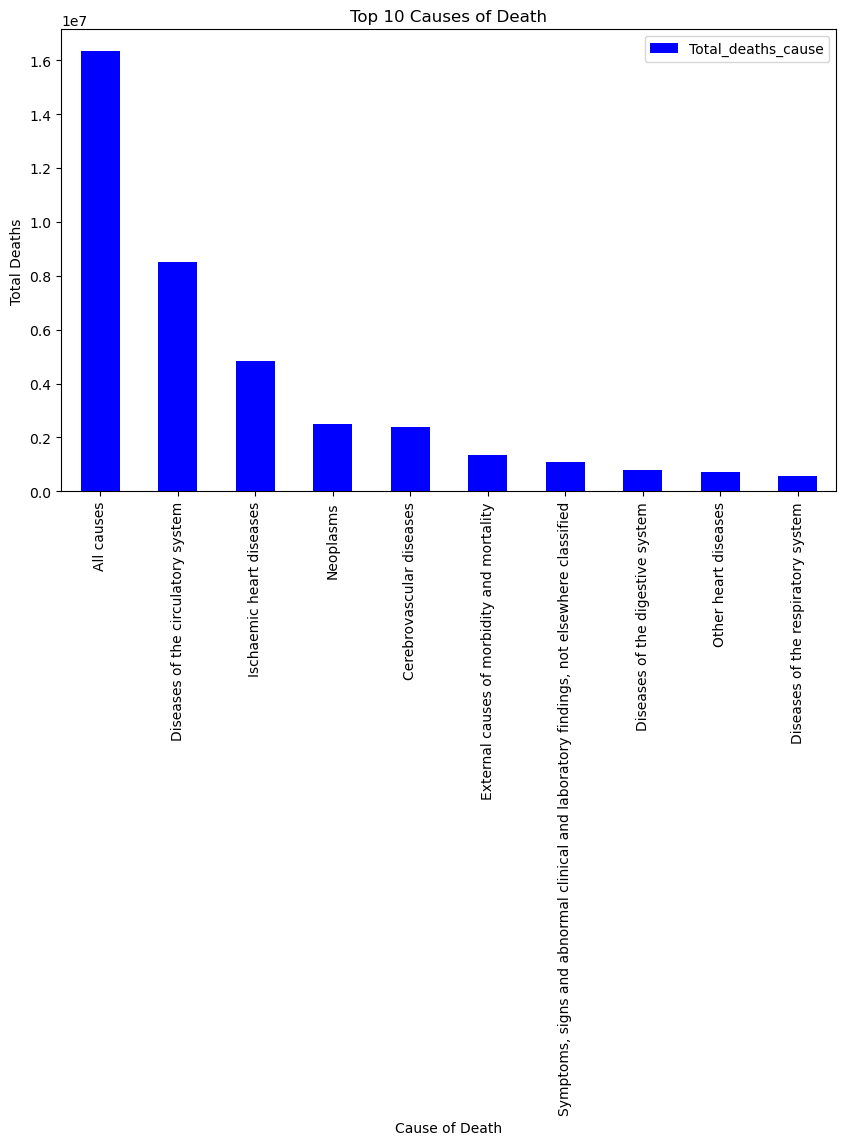

In [414]:
#TOP 10 CAUSES DEATHS BAR CHART
cause_totals.sort_values('Total_deaths_cause', ascending=False).head(10).plot(kind='bar', x='Cause_Name', y='Total_deaths_cause', color='blue', figsize=(10, 6))
plt.title('Top 10 Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.show()


In [415]:
#TOTAL DEATHS BY YEAR AND PERCENTAGE INCREMENT

#CREATING A LIST INCLUDING THE YEARS
years = list(range(2013, 2023))

#TOTAL DEATHS BY YEAR
total_deaths_by_year = [
    merged_data[merged_data['Year'] == year]['Total_deaths'].sum() for year in years
]

#GETTING THE PERCENTAGE INCREMENT
percentage_increment = [None]  
for i in range(1, len(total_deaths_by_year)):
    increment = ((total_deaths_by_year[i] - total_deaths_by_year[i - 1]) / total_deaths_by_year[i - 1]) * 100
    percentage_increment.append(round(increment, 2))

#GETTING THE DOTS WHERE THEY HAVE TO BE TO MAKE THE DOCUMENT READABLE
formatted_total_deaths = [f"{deaths:,.2f}" for deaths in total_deaths_by_year]

#NEW DF FOR TOTAL DEATHS BY YEAR AND PERCENTAGE INCREMENT
deaths_by_year_df = pd.DataFrame({
    'Year': years,
    'Total Deaths': formatted_total_deaths,
    'Percentage Increment (%)': percentage_increment
})

# Display the DataFrame
print(deaths_by_year_df)


   Year   Total Deaths  Percentage Increment (%)
0  2013  38,472,899.00                       NaN
1  2014  41,909,211.00                      8.93
2  2015  41,864,989.00                     -0.11
3  2016  41,497,061.00                     -0.88
4  2017  42,958,213.00                      3.52
5  2018  42,691,228.00                     -0.62
6  2019  41,771,681.00                     -2.15
7  2020  33,404,209.00                    -20.03
8  2021  26,503,487.00                    -20.66
9  2022   2,701,209.00                    -89.81


## NEW DASHBOARD CONSTRUCTION WITH THE DATAFRAME PART5_DF, For Age Distribution and Causes 

In [416]:
part5_df.head(10)

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,4303,Ukraine,2017,101,1000,All causes,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68
1,4303,Ukraine,2017,101,1000,All causes,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19
2,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,1,6198,41,0,0,0,29,65,3019,2670,358,15,1
3,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,2,2516,29,0,0,0,19,51,1317,808,263,29,0
4,4303,Ukraine,2017,101,1002,Cholera,1,0,0,0,0,0,0,0,0,0,0,0,0
5,4303,Ukraine,2017,101,1002,Cholera,2,0,0,0,0,0,0,0,0,0,0,0,0
6,4303,Ukraine,2017,101,1003,Diarrhoea and gastroenteritis of presumed infe...,1,1,0,0,0,0,0,0,0,1,0,0,0
7,4303,Ukraine,2017,101,1003,Diarrhoea and gastroenteritis of presumed infe...,2,1,0,0,0,0,0,0,0,0,1,0,0
8,4303,Ukraine,2017,101,1004,Other intestinal infectious diseases,1,18,6,0,0,0,2,0,3,5,2,0,0
9,4303,Ukraine,2017,101,1004,Other intestinal infectious diseases,2,4,1,0,0,0,0,0,0,0,2,1,0


In [417]:
#Renaming columns in part5_df for better context and readability
rename_columns = {
    'mort_day0': '1 Day Mortality',
    'mort_day1_6': '1-6 Day Mortality',
    'mort_day7_27': '7-27 Day Mortality',
    'mort_day28_365': '28-364 Day Mortality',
    'mort_1_4': '1 to 4 Years Mortality',
    'mort_5_24': '5 to 24 Years Mortality',
    'mort_25_44': '25 to 44 Years Mortality',
    'mort_45_64': '45 to 64 Years Mortality',
    'mort_65_84': '65 to 84 Years Mortality',
    'mort_85_95+': '85 to 95+ Years Mortality'
}

part5_df.rename(columns=rename_columns, inplace=True)




In [418]:
#Checking new columns names in part5_df
part5_df.head(5)

,Country_code,Country_name,Year,List,Cause_Code,Cause_Name,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,1 to 4 Years Mortality,5 to 24 Years Mortality,25 to 44 Years Mortality,45 to 64 Years Mortality,65 to 84 Years Mortality,85 to 95+ Years Mortality,Deaths26
0,4303,Ukraine,2017,101,1000,All causes,1,281784,1608,0,0,0,357,2593,26494,86787,134693,29184,68
1,4303,Ukraine,2017,101,1000,All causes,2,292339,1178,0,0,0,241,998,9009,37295,155328,88271,19
2,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,1,6198,41,0,0,0,29,65,3019,2670,358,15,1
3,4303,Ukraine,2017,101,1001,Certain infectious and parasitic diseases,2,2516,29,0,0,0,19,51,1317,808,263,29,0
4,4303,Ukraine,2017,101,1002,Cholera,1,0,0,0,0,0,0,0,0,0,0,0,0


## Click Here to Check the dashboard on your local borwser ===> http://127.0.0.1:8050/

In [ ]:
#LOADING DATA
data = part5_df

#DROPPING NAN VALUES IF THERE ARE ANY
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year', 'Cause_Name'])
data['Year'] = data['Year'].astype(int)
data['Cause_Name'] = data['Cause_Name'].astype(str)

# DATA FOR AGE GROUP IMPACT
age_columns = [col for col in data.columns if 'Mortality' in col]

#RUNNING APP FOR AGE GROUP IMPACT
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Age Group Impact"),
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(data['Year'].unique())],
        value=data['Year'].unique()[0]
    ),
    html.Label("Select Cause:"),
    dcc.Dropdown(
        id='cause-dropdown',
        options=[{'label': cause, 'value': cause} for cause in sorted(data['Cause_Name'].unique())],
        value="All causes"
    ),
    dcc.Graph(id='age-range-chart')
])

@app.callback(
    Output('age-range-chart', 'figure'),
    [Input('year-dropdown', 'value'), Input('cause-dropdown', 'value')]
)
def update_chart(selected_year, selected_cause):
    filtered_data = data[data['Year'] == selected_year]
    if selected_cause != "All causes":
        filtered_data = filtered_data[filtered_data['Cause_Name'] == selected_cause]

    #MAKING SURE THE AGE COLUMNS ARE IN THE DATA
    if not set(age_columns).issubset(filtered_data.columns):
        return px.bar(title="Missing Age Range Columns")

    #SUM AGE GROUP DATA AND CALCULATE PERCENTAGES
    age_data = filtered_data[age_columns].sum().reset_index()
    age_data.columns = ['Age Range', 'Total Deaths']
    total_deaths = age_data['Total Deaths'].sum()
    age_data['Percentage'] = (age_data['Total Deaths'] / total_deaths) * 100

    #CREATE BAR CHART WITH PERCENTAGE DISTRIBUTION BY AGE RANGE 
    fig = px.bar(
        age_data,
        x='Age Range',
        y='Total Deaths',
        title=f"Mortality Distribution by Age Range ({selected_cause}) in {selected_year}",
        text=age_data['Percentage'].map("{:.2f}%".format),  
        labels={'Total Deaths': 'Total Deaths', 'Age Range': 'Age Range'},
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig.update_traces(textposition='outside')  
    fig.update_layout(barmode='stack', xaxis_tickangle=-45)
    return fig

#RUNNING THE APP
if __name__ == '__main__':
    app.run_server(debug=True)



C:\Users\User\AppData\Local\Temp\ipykernel_25476\3053746493.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_25476\3053746493.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Click Here to Check the dashboard on your local borwser ===> http://127.0.0.1:8050/